##### 저장된 모델 활용
- 모델 파일 종류
    * 가중치 및 절편 저장 파일 => 동일한 구조 모델 인스턴스 생성 후 사용 가능
    * 모델 전체 저장 파일 => 바로 로딩 후 사용 가능


[1] 모듈 로딩 <hr>

In [ ]:
# 모듈 로딩

# 경로 지정 모듈 로딩
import sys
sys.path.append(r'C:\Users\KDP-50\OneDrive\바탕 화면\KDT_DYH\MyClass')
import os

# 커스텀 모듈 로딩
from DL_Modules import *
from DL_func import *
from DL_Reg_Class import *
from ML_preprocessing import *

torch Ver.:2.4.1
pandas Ver.:2.0.3
numpy Ver.:1.24.3


In [2]:
def check_path(path):
    if os.path.exists(path):
        print(f'{path} 경로가 존재.')
    else:
        print(f'{path} 경로가 존재 X, 재설정 요')

In [3]:
## 모델 파일 관련

# DEVICE 설정
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# 저장 경로
# SAVE_PATH='DYH_models/'
SAVE_PATH='models/'

# 모델 구조 및 파라미터 모두 저장 파일명
# SAVE_MODEL=SAVE_PATH+'model_num_loss(0.1156)_score(0.9978)'
SAVE_MODEL=SAVE_PATH+'model_num_loss(8.6757)_score(0.9410)'

check_path(SAVE_PATH)
check_path(SAVE_MODEL)

models/ 경로가 존재.
models/model_num_loss(8.6757)_score(0.9410) 경로가 존재.


[2] 모델 로딩 - 모델 전체 파일 사용

In [4]:
fruits_Model = torch.load(SAVE_MODEL, weights_only=False)

In [5]:
# print(fruits_Model)

In [6]:
# summary(fruits_Model)

[3] 예측 <hr>

In [7]:
# ---------------------------------------------------------------------
# 이미지 관련 모듈 로딩
# ---------------------------------------------------------------------
import cv2
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2

In [8]:
## 테스트 이미지 관련 설정
IMG_PATH = '../Project/4fruits/strawberry/'
IMG_FILE = IMG_PATH+'strawberry (3598).jpg'

check_path(IMG_PATH)
check_path(IMG_FILE)

../Project/4fruits/strawberry/ 경로가 존재.
../Project/4fruits/strawberry/strawberry (3598).jpg 경로가 존재.


In [9]:
cv_img = cv2.imread(IMG_FILE)
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
pil_img = Image.open(IMG_FILE)

In [10]:
## 데이터 변형 및 전처리
transConvert = v2.Compose([
    v2.Resize([256, 256]),
    v2.RandomResizedCrop(224),
    v2.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.ToDtype(torch.float32, scale=True)
])

c:\Users\KDP-50\anaconda3\envs\TORCH_CV_38\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [11]:
pil_img = transConvert(pil_img)
pil_img.shape

torch.Size([3, 224, 224])

In [12]:
pil_img = pil_img.unsqueeze(0)
pil_img.shape

torch.Size([1, 3, 224, 224])

In [13]:
# 검증 모드로 모델 설정
fruits_Model.eval()

with torch.no_grad():

    # 추론/평가
    pre_val=fruits_Model(pil_img)
    # pre_val=F.softmax(pre_val)
    pre_val=pre_val.argmax().item()

In [14]:
check_fruit_dict = {'apple':0,'banana':1,'orange':2,'strawberry':3}

In [15]:
result = [key for key, val in check_fruit_dict.items() if val == pre_val][0]

In [16]:
print(f'이미지의 과일은 {result}입니다.')

이미지의 과일은 strawberry입니다.


In [ ]:
# 모듈 로딩
import torch
import matplotlib.pyplot as plt

# 일반적인 텐서 생성 [H, W, C]
cvTensor1= torch.tensor(cv_img)
print(f'cvTensor1  : {cvTensor1.shape}, {cvTensor1.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서/위치 자동 [C, H, W]
cvTensor2= transforms.ToTensor()(cv_img)
print(f'cvTensor2  : {cvTensor2.shape}, {cvTensor2.ndim}D')

cvTensor1  : torch.Size([183, 275, 3]), 3D
cvTensor2  : torch.Size([3, 183, 275]), 3D


cvNP : (183, 275, 3), 3


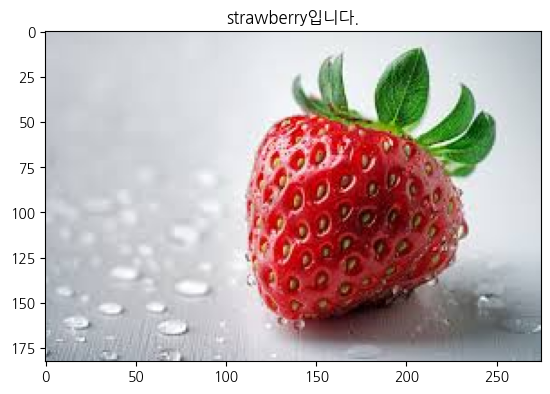

In [20]:
cvNP = cvTensor1.numpy()
print(f'cvNP : {cvNP.shape}, {cvNP.ndim}')

plt.title(f'{result}입니다.')
plt.imshow(cvNP)
plt.show()